# Financial Data Analysis

#### Note : This project is an to test Data Visualization and pandas skills and not be treated as any kind of financial advice. Purely for academic purpose.

#### This will be analysis of bank stocks starting from period from Jan 1st 2006 to Jan 1st 2016 ( from just before financial crash to 2016 )

#### We will be using panads-datareader to load stock data directly from internet ( google finance ).

In [48]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

#### We will be using pandas datareader to get the stock prices data for following stocks
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

Reference : [pandas_datareader](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html)

#### Setting start date and end date in datetime format ( required for DataReader call ).

In [49]:
pd.options.display.max_columns = None

In [50]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

#### Fetching data for banks from intenet

In [51]:
#Bank of America
BAC = data.DataReader("BAC",'yahoo',start,end)
#Citibank
C = data.DataReader("C",'yahoo',start,end)
#Goldman Sachs
GS = data.DataReader("GS",'yahoo',start,end)
#JP Morgan
JPM = data.DataReader("JPM",'yahoo',start,end)
#Morgan Stanely
MS = data.DataReader("MS",'yahoo',start,end)
#Wells Fargo
WFC = data.DataReader("WFC",'yahoo',start,end)


In [52]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,34.596096
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.228691
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,34.272778
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,34.221321
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,34.243366


In [53]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

#### Concat all bank dataframes, set keys = ticker... for multilevel columns

In [54]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], axis = 1, keys=tickers)

In [55]:
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  34.596096   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.228691   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.272778   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.221321   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.243366   

                     C                                                 \
                  High         Low        Open       Close     Volume   
Date                                                                    
2006-01-03  493.799988  481.100006  490.000000  492.899994  1537600.0   
2006-01-04  491.000000  483.500000  488.600006  483.799988  1870900.0   
2006-01-05  487.799988  484.000000  484.399994  486.200012  1143100.0   
2006-01-06  489.000000  482.000000  488.799988  486.200012  1370200.0   
2006-01-09  487.399994  483.000000  486.000000  483.899994  1680700.0   

                                GS                                      \
             Adj Close        High         Low        Open       Close   
Date                                                                     
2006-01-03  379.511047  129.440002  124.230003  126.699997  128.869995   
2006-01-04  372.504486  128.910004  126.379997  127.349998  127.089996   
2006-01-05  374.352448  127.320000  125.610001  126.000000  127.040001   
2006-01-06  374.352448  129.250000  127.290001  127.290001  128.839996   
2006-01-09  372.581421  130.619995  128.000000  128.500000  130.389999   

                                         JPM                                   \
               Volume   Adj Close       High        Low       Open      Close   
Date                                                                            
2006-01-03  6188700.0  105.687309  40.360001  39.299999  39.830002  40.189999   
2006-01-04  4861600.0  104.227493  40.139999  39.419998  39.779999  39.619999   
2006-01-05  3717400.0  104.186478  39.810001  39.500000  39.610001  39.740002   
2006-01-06  4319600.0  105.662666  40.240002  39.549999  39.919998  40.020000   
2006-01-09  4723500.0  106.933891  40.720001  39.880001  39.880001  40.669998   

                                          MS                                   \
                Volume  Adj Close       High        Low       Open      Close   
Date                                                                            
2006-01-03  12838600.0  27.013376  58.490002  56.740002  57.169998  58.310001   
2006-01-04  13491500.0  26.857462  59.279999  58.349998  58.700001  58.349998   
2006-01-05   8109400.0  26.938803  58.590000  58.020000  58.549999  58.509998   
2006-01-06   7966900.0  27.128614  58.849998  58.049999  58.770000  58.570000   
2006-01-09  16575200.0  27.569229  59.290001  58.619999  58.630001  59.189999   

                                        WFC                                   \
               Volume  Adj Close       High        Low       Open      Close   
Date                                                                           
2006-01-03  5377000.0  36.867344  31.975000  31.195000  31.600000  31.900000   
2006-01-04  7977800.0  36.892612  31.820000  31.365000  31.799999  31.530001   
2006-01-05  5778000.0  36.993786  31.555000  31.309999  31.500000  31.495001   
2006-01-06  6889800.0  37.031731  31.775000  31.385000  31.580000  31.680000   
2006-01-09  4144500.0  37.423725  31.825001  31.555000  31.674999  31.674999   

                                   
                Volume  Adj Close  
Date                               
2006-01-03  11016400.0  20.723480  
2006-01-04  10870000.0  20.483118  
2006-01-05  10158000.0  20.460379  
2006-01-06   8403800.0  20.580564  


#### Setting column names level

In [56]:
names = ['Bank Ticker','Stock Info']

In [57]:
bank_stocks.columns.names = names

In [58]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      \
Stock Info   Adj Close        High         Low        Open       Close   
Date                                                                     
2006-01-03   34.596096  493.799988  481.100006  490.000000  492.899994   
2006-01-04   34.228691  491.000000  483.500000  488.600006  483.799988   
2006-01-05   34.272778  487.799988  484.000000  484.399994  486.200012   
2006-01-06   34.221321  489.000000  482.000000  488.799988  486.200012   
2006-01-09   34.243366  487.399994  483.000000  486.000000  483.899994   

Bank Ticker                                 GS                          \
Stock Info      Volume   Adj Close        High         Low        Open   
Date                                                                     
2006-01-03   1537600.0  379.511047  129.440002  124.230003  126.699997   
2006-01-04   1870900.0  372.504486  128.910004  126.379997  127.349998   
2006-01-05   1143100.0  374.352448  127.320000  125.610001  126.000000   
2006-01-06   1370200.0  374.352448  129.250000  127.290001  127.290001   
2006-01-09   1680700.0  372.581421  130.619995  128.000000  128.500000   

Bank Ticker                                           JPM             \
Stock Info        Close     Volume   Adj Close       High        Low   
Date                                                                   
2006-01-03   128.869995  6188700.0  105.687309  40.360001  39.299999   
2006-01-04   127.089996  4861600.0  104.227493  40.139999  39.419998   
2006-01-05   127.040001  3717400.0  104.186478  39.810001  39.500000   
2006-01-06   128.839996  4319600.0  105.662666  40.240002  39.549999   
2006-01-09   130.389999  4723500.0  106.933891  40.720001  39.880001   

Bank Ticker                                                      MS  \
Stock Info        Open      Close      Volume  Adj Close       High   
Date                                                                  
2006-01-03   39.830002  40.189999  12838600.0  27.013376  58.490002   
2006-01-04   39.779999  39.619999  13491500.0  26.857462  59.279999   
2006-01-05   39.610001  39.740002   8109400.0  26.938803  58.590000   
2006-01-06   39.919998  40.020000   7966900.0  27.128614  58.849998   
2006-01-09   39.880001  40.669998  16575200.0  27.569229  59.290001   

Bank Ticker                                                               WFC  \
Stock Info         Low       Open      Close     Volume  Adj Close       High   
Date                                                                            
2006-01-03   56.740002  57.169998  58.310001  5377000.0  36.867344  31.975000   
2006-01-04   58.349998  58.700001  58.349998  7977800.0  36.892612  31.820000   
2006-01-05   58.020000  58.549999  58.509998  5778000.0  36.993786  31.555000   
2006-01-06   58.049999  58.770000  58.570000  6889800.0  37.031731  31.775000   
2006-01-09   58.619999  58.630001  59.189999  4144500.0  37.423725  31.825001   

Bank Ticker                                                          
Stock Info         Low       Open      Close      Volume  Adj Close  
Date                                                                 
2006-01-03   31.195000  31.600000  31.900000  11016400.0  20.723480  
2006-01-04   31.365000  31.799999  31.530001  10870000.0  20.483118  
2006-01-05   31.309999  31.500000  31.495001  10158000.0  20.460379  
2006-01-06   31.385000  31.580

### Exploratory Data Analysis

#### Getting the highest price for each stock in given period

In [59]:
for tick in tickers:
    print(tick , bank_stocks[tick]['Close'].max() )

BAC 54.900001525878906
C 564.0999755859375
GS 247.9199981689453
JPM 70.08000183105469
MS 89.30000305175781
WFC 58.52000045776367


#### Can obtain the same result with cross section method ( .xs() )of pandas... Cleaner

In [60]:
bank_stocks.xs(key = 'Close', level = 'Stock Info', axis = 1)

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999
...,...,...,...,...,...,...
2015-12-24,17.270000,52.709999,182.470001,66.599998,32.480000,54.820000
2015-12-28,17.129999,52.380001,181.619995,66.379997,32.169998,54.680000
2015-12-29,17.280001,52.980000,183.529999,67.070000,32.549999,55.290001


##### applying max() to this cross section method will apply to whole df

In [61]:
bank_stocks.xs(key = 'Close', level = 'Stock Info', axis = 1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

#### Calulating Returns for each day :
 Change of each stock wrt prior day closing price
 STEPS :
 * Create an empty dataframe
 * Use pandas pct_change function

In [62]:
#creating empty dataframe
returns = pd.DataFrame()

In [63]:
#adding return column for each stock
#pct_change() will broadcast in the entire dataframe
for tick in tickers:
    returns[tick + ' Returns'] = bank_stocks[tick]['Close'].pct_change()

In [64]:
returns

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


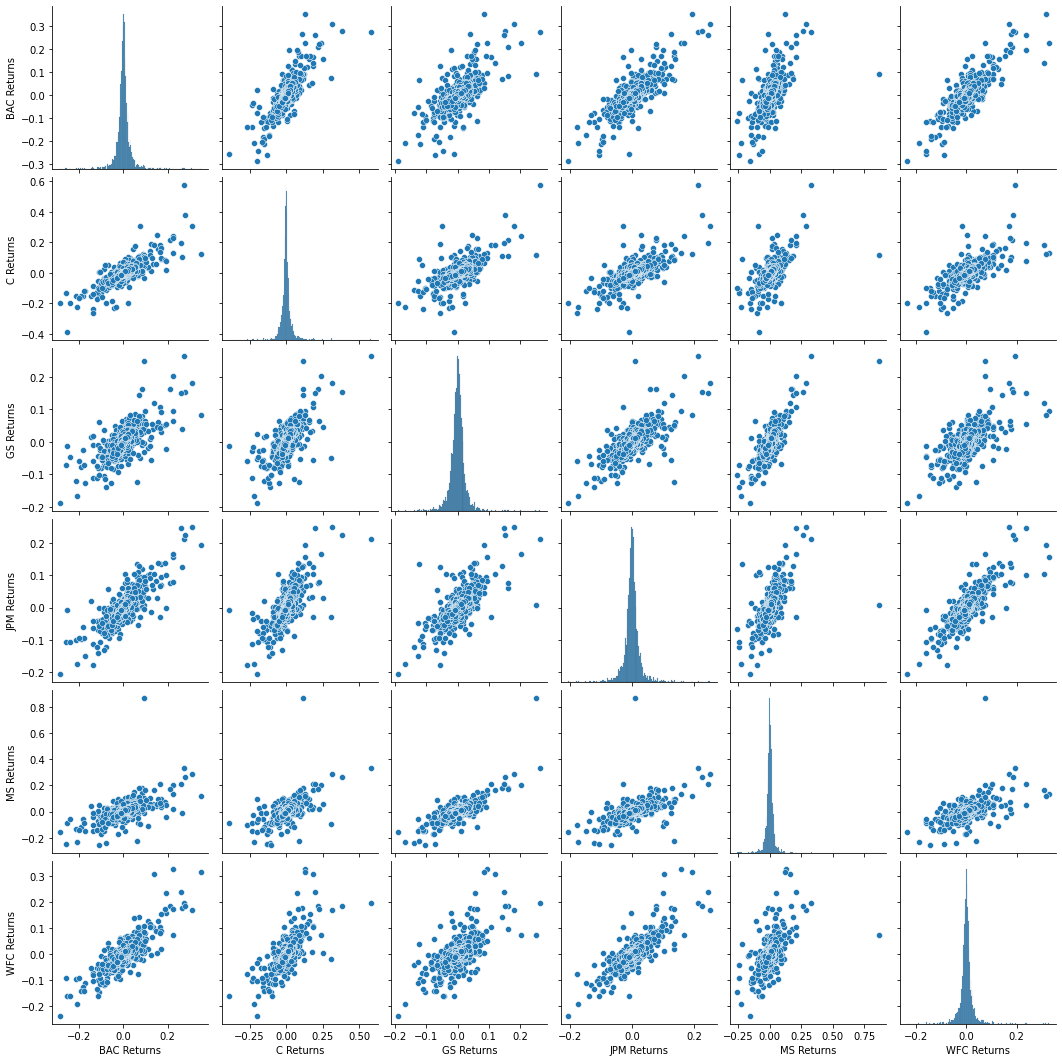

In [65]:
sns.pairplot(returns)

#### date of worst fall

In [77]:
returns.idxmin()

BAC Returns   2009-01-20
C Returns     2009-02-27
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

In [74]:
returns.idxmax()

BAC Returns   2009-04-09
C Returns     2008-11-24
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]